In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
DB_FILENAME = 'available_log.db'

In [61]:
class Polygon:
    def __init__(self, name, time_probs, index):
        """you must insert to time_prob this one(0,p(0))"""
        self.name = name
        self.time_probs = time_probs  # a list of tuples (t,P(t))
        self.index = index
        self.time_probs
        self.time_vec = [i[0] for i in self.time_probs]
        self.prob_vec = [i[1] for i in self.time_probs]
    def prob_for_finding(self, t):
        return np.interp(t, self.time_vec, self.prob_vec)
    def plot(self):
        xvals = np.linspace(0, 25, 100)
        yinterp = np.interp(xvals, self.time_vec, self.prob_vec)
        
#         plt.figure(figsize=(16,4))
        plt.plot(xvals, yinterp, label=self.name)
        plt.title(self.name)
        plt.xticks(range(25))
        plt.grid()
        plt.legend()

In [62]:
mosachim = Polygon(**mosachim_data)

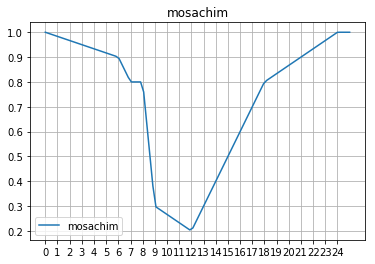

In [63]:
mosachim.plot()

In [64]:
names = ['mosachim', 'shapira', 'north', 'jerusalem', 'gina']

mosachim_data = {'name':'mosachim', 'index':1, 'time_probs':[(0,1),(6,0.9),(7,0.8),(8,0.8),(9,0.3),(12,0.2),(18,0.8),(24,1)]}
shapira_data = {'name':'shapira', 'index':2, 'time_probs':[(0,1),(6,0.8),(7,0.8),(8,0.9),(9,0.9),(12,0.9),(18,0.8),(24,1)]}
gina_data = {'name':'gina', 'index':5, 'time_probs':[(0,1),(6,0.9),(7,0.9),(8,0.5),(9,0.4),(12,0.1),(18,0.6),(24,1)]}
north_data = {'name':'north', 'index':3, 'time_probs':[(0,0.8),(6,1),(8,0.4),(12,0.4),(18,0.3),(24,0.8)]}
jerusalem_data = {'name':'jerusalem', 'index':4, 'time_probs':[(0,1),(6,1),(12,0.1),(18,0.9),(24,1)]}

list_of_poly_data = [mosachim_data, shapira_data, north_data, jerusalem_data, gina_data]

In [65]:
list_of_polygons = []
for data in list_of_poly_data:
    list_of_polygons.append(Polygon(**data))

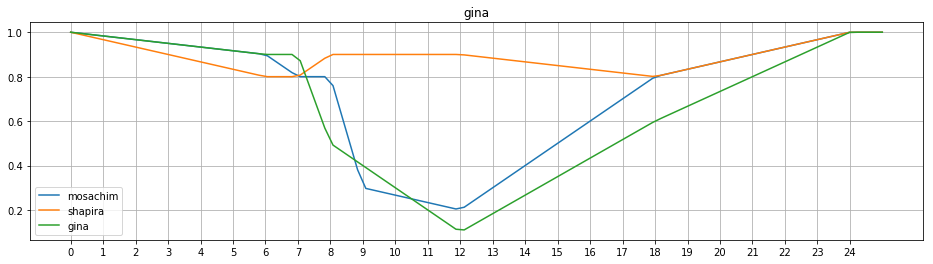

In [68]:
plt.figure(figsize=(16,4))
for poly in [list_of_polygons[0], list_of_polygons[1], list_of_polygons[4]]:
    poly.plot()

In [69]:
update_times = np.random.uniform(low=0,high=24,size=1000)

In [70]:
results = []
for poly in list_of_polygons:
    results.append(poly.prob_for_finding(update_times) > np.random.uniform(size=update_times.shape))

In [71]:
with sqlite3.connect(DB_FILENAME) as con:
    cur = con.cursor()
    cur.execute(""" CREATE TABLE IF NOT EXISTS log_tbl (
                    id INTEGER PRIMARY KEY,
                    area_id INT,
                    time REAL,
                    found REAL
                    );""")
    cur.close()

In [73]:
for i, poly in enumerate(list_of_polygons):
    n = len(update_times)
    with sqlite3.connect(DB_FILENAME) as con:
        cur = con.cursor()
        data = list(zip(n*[i+1], list(update_times), list(1.0*results[i])))
        stmt = "INSERT INTO log_tbl (area_id, time, found) VALUES (?, ?, ?)"
        cur.executemany(stmt, data)
        cur.close()